In [1]:
import pandas as pd
import ast
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

c:\Users\Wildan Aziz\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_1 = pd.read_csv('data/page_1_to_50.csv')
df_2 = pd.read_csv('data/page_51_to_100.csv')
df = pd.concat([df_1, df_2], ignore_index=True)
df.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL,List_URL
0,Nosferatu,2024,Robert Eggers,"['Lily-Rose Depp', 'Nicholas Hoult', 'Bill Ska...",3.85,NaN,"['Drama', 'Fantasy', 'Horror']",133.0,['USA'],English,...,25493,33560,103241,154221,312256,162607,152158,959944,https://letterboxd.com/film/nosferatu-2024/,https://letterboxd.com/films/ajax/popular/this...
1,Wicked,2024,Jon M. Chu,"['Cynthia Erivo', 'Ariana Grande', 'Jeff Goldb...",3.95,NaN,"['Romance', 'Drama', 'Fantasy']",162.0,['USA'],English,...,23214,32167,109190,146838,323004,179664,378065,1208483,https://letterboxd.com/film/wicked-2024/,https://letterboxd.com/films/ajax/popular/this...
2,Wallace & Gromit: Vengeance Most Fowl,2024,"Merlin Crossingham, Nick Park","['Ben Whitehead', 'Peter Kay', 'Lauren Patel',...",3.95,NaN,"['Adventure', 'Family', 'Comedy', 'Animation']",79.0,['UK'],English,...,1589,3030,18284,35623,83571,28683,39470,210912,https://letterboxd.com/film/wallace-gromit-ven...,https://letterboxd.com/films/ajax/popular/this...
3,The Substance,2024,Coralie Fargeat,"['Demi Moore', 'Margaret Qualley', 'Dennis Qua...",3.84,NaN,"['Horror', 'Science Fiction']",141.0,"['France', 'UK', 'USA']",English,...,50295,56049,171308,221586,488374,253480,314285,1599100,https://letterboxd.com/film/the-substance/,https://letterboxd.com/films/ajax/popular/this...
4,Anora,2024,Sean Baker,"['Mikey Madison', 'Mark Eydelshteyn', 'Yura Bo...",4.06,NaN,"['Drama', 'Romance', 'Comedy']",139.0,['USA'],English,...,13140,16652,54108,84690,215069,152572,138212,684677,https://letterboxd.com/film/anora/,https://letterboxd.com/films/ajax/popular/this...


In [3]:
unique_genres = set()
for genres in df['Genres']:
    if pd.notna(genres):
        genres_list = ast.literal_eval(genres)
        unique_genres.update(genres_list)

for genre in unique_genres:
    print(genre)

Epic heroes
Western
Comedy
Sci-fi horror, creatures, and aliens
Family
TV Movie
Horror
Animation
Horror, the undead and monster classics
Gory, gruesome, and slasher horror
Twisted dark psychological thriller
Bloody vampire horror
Science Fiction
Fantasy adventure, heroism, and swordplay
Adventure
Crime
Intense combat and martial arts
Superheroes in action-packed battles with villains
Drama
Fantasy
Action
Survival horror and zombie carnage
Thriller
War
Music
Documentary
Action-packed space and alien sagas
Mystery
History
Thought-provoking sci-fi action and future technology
Romance
Show All…


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6984 entries, 0 to 6983
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         6984 non-null   object 
 1   Release_year       6984 non-null   int64  
 2   Director           6967 non-null   object 
 3   Cast               6934 non-null   object 
 4   Average_rating     6957 non-null   float64
 5   Owner_rating       0 non-null      float64
 6   Genres             6973 non-null   object 
 7   Runtime            6956 non-null   float64
 8   Countries          6923 non-null   object 
 9   Original_language  6984 non-null   object 
 10  Spoken_languages   6984 non-null   object 
 11  Description        6977 non-null   object 
 12  Studios            6882 non-null   object 
 13  Watches            6984 non-null   int64  
 14  List_appearances   6984 non-null   int64  
 15  Likes              6984 non-null   int64  
 16  Fans               6984 

In [5]:
# Standardize numerical columns
numerical_columns = ['Average_rating', 'Runtime', 'Fans', 'Watches', 'List_appearances', 'Likes', 'Total_ratings']

# Fill NaN values with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
new_df = df[numerical_columns]

new_df.head()

,Average_rating,Runtime,Fans,Watches,List_appearances,Likes,Total_ratings
0,0.765884,0.292036,0.863223,1.554632,2.605212,1.944568,2.424160
1,0.933734,0.719894,1.867381,2.123943,2.376814,2.819354,3.190443
2,0.933734,-0.504667,-0.190741,-0.068831,-0.025368,0.129536,0.114779
3,0.749099,0.410065,1.666550,3.010556,4.171639,3.378046,4.394776
4,1.118369,0.380558,0.863223,0.998290,2.324657,1.394603,1.575469


In [6]:
# Standardize categorical columns
categorical_columns = ['Genres', 'Countries']

# Fill NaN values with '[]'
df[categorical_columns] = df[categorical_columns].fillna('[]')

for column in categorical_columns:
    df[column] = df[column].apply(ast.literal_eval)

    mlb = MultiLabelBinarizer()

    df_encoded = mlb.fit_transform(df[column])
    df_encoded_df = pd.DataFrame(df_encoded, columns=[f"{column}_{label}" for label in mlb.classes_])

    new_df = pd.concat([new_df, df_encoded_df], axis=1)

new_df.head()

,Average_rating,Runtime,Fans,Watches,List_appearances,Likes,Total_ratings,Genres_Action,Genres_Action-packed space and alien sagas,Genres_Adventure,...,Countries_Turkey,Countries_UK,Countries_USA,Countries_USSR,Countries_Uganda,Countries_Ukraine,Countries_United Arab Emirates,Countries_Vietnam,Countries_Yugoslavia,Countries_Zambia
0,0.765884,0.292036,0.863223,1.554632,2.605212,1.944568,2.424160,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.933734,0.719894,1.867381,2.123943,2.376814,2.819354,3.190443,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.933734,-0.504667,-0.190741,-0.068831,-0.025368,0.129536,0.114779,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.749099,0.410065,1.666550,3.010556,4.171639,3.378046,4.394776,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1.118369,0.380558,0.863223,0.998290,2.324657,1.394603,1.575469,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
new_df.columns

Index(['Average_rating', 'Runtime', 'Fans', 'Watches', 'List_appearances',
       'Likes', 'Total_ratings', 'Genres_Action',
       'Genres_Action-packed space and alien sagas', 'Genres_Adventure',
       ...
       'Countries_Turkey', 'Countries_UK', 'Countries_USA', 'Countries_USSR',
       'Countries_Uganda', 'Countries_Ukraine',
       'Countries_United Arab Emirates', 'Countries_Vietnam',
       'Countries_Yugoslavia', 'Countries_Zambia'],
      dtype='object', length=130)

In [12]:
# Fit UMAP and transform the data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_embedding = umap_model.fit_transform(new_df)

# Add UMAP results back to DataFrame
df['umap_1'] = umap_embedding[:, 0]
df['umap_2'] = umap_embedding[:, 1]

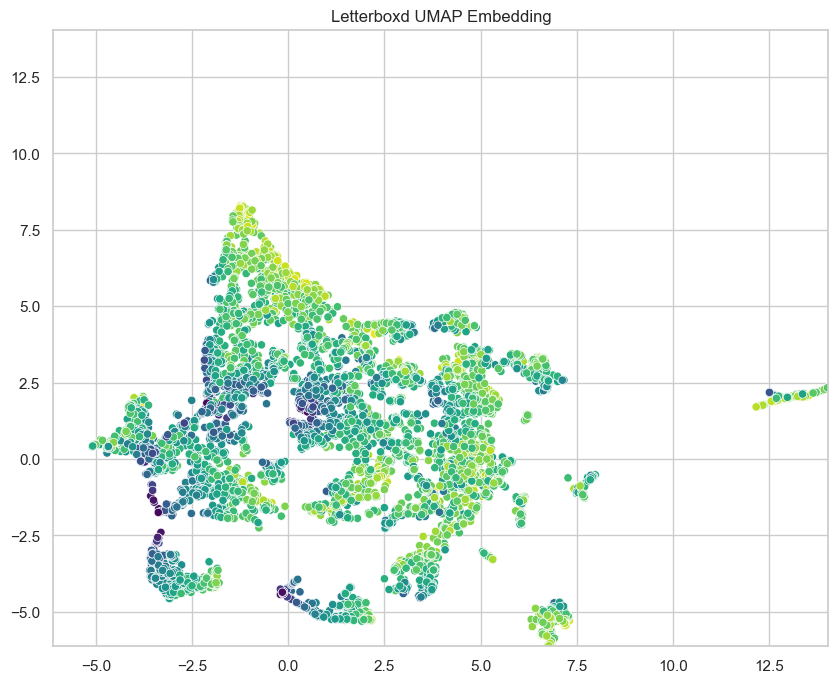

In [ ]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=df['umap_1'], y=df['umap_2'], hue=df['Average_rating'], palette='viridis', sizes=(50, 200), legend=None)

plt.xlim(-10, 10)  # Set the limits for x-axis to a smaller range (example values)
plt.ylim(-10, 10)  # Set the limits for y-axis to a smaller range (example values)

plt.title('Letterboxd UMAP Embedding')
plt.xlabel('')
plt.ylabel('')
plt.savefig('data/umap.png')
plt.show()